In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def table_review(df):
    isnull = df.isnull().sum()
    type_columns = df.dtypes
    pre = round((isnull/len(df))*100, 2)
    dc = pd.DataFrame({"Type":type_columns,
                       "Isnull":isnull,
                       "Missing data ٪":pre})
    print(dc.sort_values(by = "Missing data ٪", ascending = False))

In [3]:
data = pd.read_csv('data.csv', sep=',', encoding='latin1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data = data[['CustomerID', 'Quantity', 'UnitPrice', 'InvoiceDate', 'InvoiceNo']]
table_review(data)

                Type  Isnull  Missing data ٪
CustomerID   float64  135080           24.93
Quantity       int64       0            0.00
UnitPrice    float64       0            0.00
InvoiceDate   object       0            0.00
InvoiceNo     object       0            0.00


In [5]:
data_rfm = data.dropna(subset= ['CustomerID', 'Quantity', 'InvoiceDate', 'UnitPrice'] )
data_rfm['InvoiceDate'] = pd.to_datetime(data_rfm['InvoiceDate'])
data_rfm['TotalPrice'] = data_rfm['Quantity'] * data_rfm['UnitPrice']

C:\Users\gabriel.ribeiro\AppData\Local\Temp\ipykernel_12156\3993644201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rfm['InvoiceDate'] = pd.to_datetime(data_rfm['InvoiceDate'])
C:\Users\gabriel.ribeiro\AppData\Local\Temp\ipykernel_12156\3993644201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rfm['TotalPrice'] = data_rfm['Quantity'] * data_rfm['UnitPrice']


In [6]:
reference_date = pd.to_datetime('2011-12-10')
rfm = data_rfm.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x: (reference_date -x.max()).days,
    'InvoiceNo' : 'nunique',
    'TotalPrice' : 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,3,176.60


In [7]:
rfm['r_score'] = pd.qcut(rfm['Recency'], 4, labels = [1, 2, 3, 4])
rfm['f_score'] = pd.qcut(rfm['Frequency'].rank(method = 'first'), 4, labels =[1, 2, 3, 4])
rfm['m_score'] = pd.qcut(rfm['Monetary'], 4, labels =[1, 2, 3, 4])
rfm['rfm_score_sum'] = (rfm['r_score'].astype(int) + rfm['f_score'].astype(int) + rfm['m_score'].astype(int))
rfm['rfm_score'] = (rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str))
rfm.head()

,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_score_sum,rfm_score
CustomerID,,,,,,,,
12346.0,325,2,0.00,4,2,1,7,421
12347.0,2,7,4310.00,1,4,4,9,144
12348.0,75,4,1797.24,3,3,4,10,334
12349.0,18,1,1757.55,2,1,4,7,214
12350.0,310,1,334.40,4,1,2,7,412


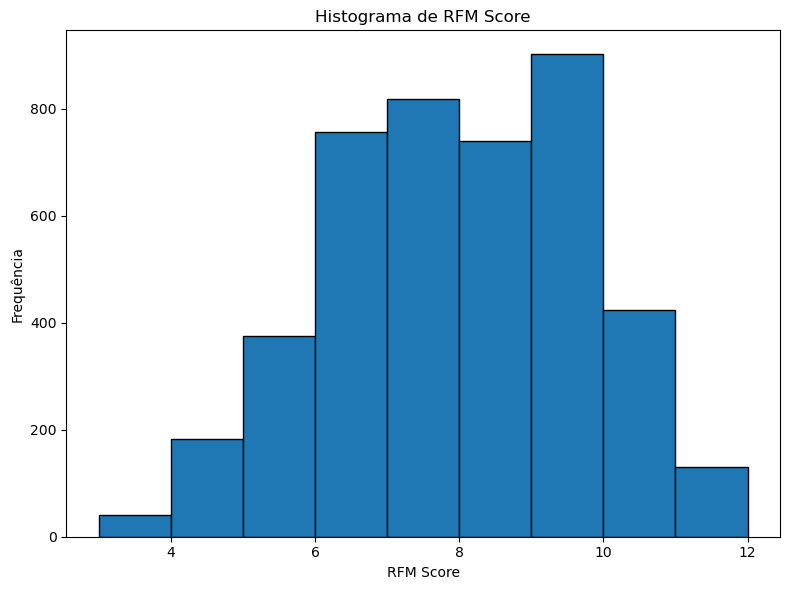

In [8]:

# Plotar o histograma de rfm_score
plt.figure(figsize=(8, 6))
plt.hist(rfm['rfm_score_sum'], bins=9, edgecolor='black')  # Especifica 10 bins e cor das bordas
plt.xlabel('RFM Score')
plt.ylabel('Frequência')
plt.title('Histograma de RFM Score')
plt.grid(False)
plt.tight_layout()
plt.show()

In [9]:
if (rfm['r_score'] == 4 & rfm['f_score'] == 1 & rfm['m_score'] <= 3):
    return 'Recém-ativo'
elif (rfm['r_score'] >= 3 & rfm['f_score'] >= 3):
    return 'Clientes leais'
elif (rfm['r_score'] >= 3 & rfm['f_score'] = 2):
    return 'Clientes potenciais'

SyntaxError: invalid syntax (2602367402.py, line 5)